<a href="https://colab.research.google.com/github/cynthianekesa/air_quality_forecasting/blob/main/Cynthia_Nekesa_air_quality_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Air Quality Forecasting Starter Notebook

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [2]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('/content/drive/MyDrive/Kaggle/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/test (1).csv')


In [5]:
df = pd.concat([train, test])

# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [7]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
df.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [8]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 0 to 13147
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        43824 non-null  int64  
 1   DEWP      43824 non-null  float64
 2   TEMP      43824 non-null  float64
 3   PRES      43824 non-null  float64
 4   Iws       43824 non-null  float64
 5   Is        43824 non-null  float64
 6   Ir        43824 non-null  float64
 7   datetime  43824 non-null  object 
 8   cbwd_NW   43824 non-null  float64
 9   cbwd_SE   43824 non-null  float64
 10  cbwd_cv   43824 non-null  float64
 11  pm2.5     28755 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 5.4+ MB


In [11]:
# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

df['datetime'] = pd.to_datetime(df['datetime'])

# Set the 'datetime' column as the index for better time-series handling
df.set_index('datetime', inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       43824 non-null  int64  
 1   DEWP     43824 non-null  float64
 2   TEMP     43824 non-null  float64
 3   PRES     43824 non-null  float64
 4   Iws      43824 non-null  float64
 5   Is       43824 non-null  float64
 6   Ir       43824 non-null  float64
 7   cbwd_NW  43824 non-null  float64
 8   cbwd_SE  43824 non-null  float64
 9   cbwd_cv  43824 non-null  float64
 10  pm2.5    28755 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.0 MB


In [13]:
df.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
datetime,,,,,,,,,,,
2010-01-01 00:00:00,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 01:00:00,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 02:00:00,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 03:00:00,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 04:00:00,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN


In [14]:
df.isnull().sum()

,0
No,0
DEWP,0
TEMP,0
PRES,0
Iws,0
Is,0
Ir,0
cbwd_NW,0
cbwd_SE,0
cbwd_cv,0


In [15]:
unused_cols=['No']
df.drop(columns=unused_cols,inplace=True)

In [16]:
df.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
datetime,,,,,,,,,,
2010-01-01 00:00:00,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 01:00:00,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 02:00:00,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 03:00:00,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 04:00:00,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN


# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [17]:
df.isnull().sum()

,0
DEWP,0
TEMP,0
PRES,0
Iws,0
Is,0
Ir,0
cbwd_NW,0
cbwd_SE,0
cbwd_cv,0
pm2.5,15069


In [19]:
df.fillna(df.mean(), inplace=True)

In [20]:
df.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
datetime,,,,,,,,,,
2010-01-01 00:00:00,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427
2010-01-01 01:00:00,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427
2010-01-01 02:00:00,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427
2010-01-01 03:00:00,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427
2010-01-01 04:00:00,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427


# EDA

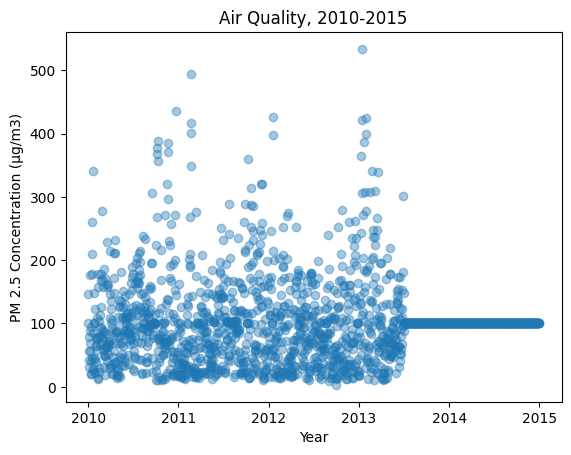

In [21]:
# Generate a simple scatter plot of daily mean PM2.5 concentration for the entire time span
scatter_y = df['pm2.5'].resample('D').mean()  # Use the correct column name
scatter_x = scatter_y.index  # The index will automatically contain the date after resampling

plt.scatter(x = scatter_x, y = scatter_y, alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality, 2010-2015')
plt.show()

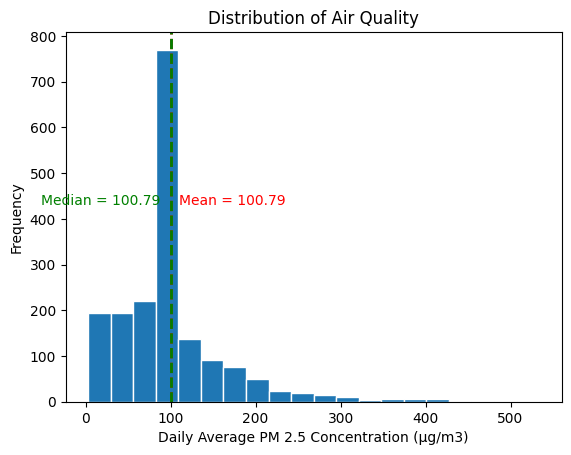

In [22]:
# Resample data to get daily mean of PM2.5
scatter_y = df['pm2.5'].resample('D').mean()  # Make sure 'pm2.5' is the correct column name

# Distribution of air quality for the period 2010-2015
plt.figure()
plt.hist(scatter_y.dropna(), bins=20, edgecolor='w', lw=1)
plt.xlabel('Daily Average PM 2.5 Concentration (μg/m3)')
plt.ylabel('Frequency')
plt.title('Distribution of Air Quality')

# Add text for mean and median
plt.text(110, 430, 'Mean = ' + str(round(scatter_y.dropna().mean(), 2)), color='red')
plt.text(-53, 430, 'Median = ' + str(round(scatter_y.dropna().median(), 2)), color='green')

# Add vertical lines for mean and median
plt.axvline(scatter_y.dropna().mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(scatter_y.dropna().median(), color='g', linestyle='dashed', linewidth=2)

plt.show()

Text(0.5, 1.0, 'Percentage of Days Within Each Air Quality Classification')

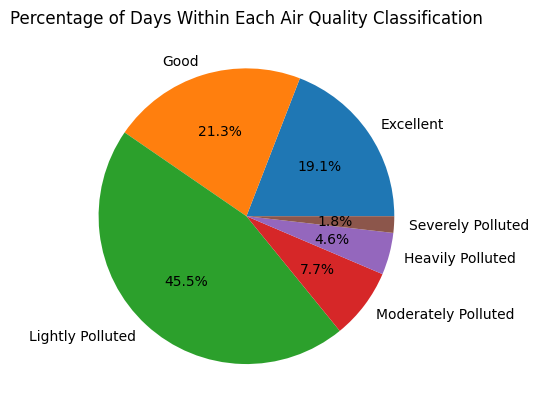

In [23]:
# Generate a pie chart to show portion of days falling into each air quality classification
excellent = len([ii for ii in scatter_y.dropna() if ii <= 50])
good = len([ii for ii in scatter_y.dropna() if ii > 50 and ii <= 100])
lightly = len([ii for ii in scatter_y.dropna() if ii > 100 and ii <= 150])
moderately = len([ii for ii in scatter_y.dropna() if ii > 150 and ii <= 200])
heavily = len([ii for ii in scatter_y.dropna() if ii > 200 and ii <= 300])
severely = len([ii for ii in scatter_y.dropna() if ii > 300])
sizes = [excellent, good, lightly, moderately, heavily, severely]
labels = ['Excellent','Good','Lightly Polluted','Moderately Polluted','Heavily Polluted','Severely Polluted']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Days Within Each Air Quality Classification')

In [28]:
df.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5,hour
datetime,,,,,,,,,,,
2010-01-01 00:00:00,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,0
2010-01-01 01:00:00,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,1
2010-01-01 02:00:00,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,2
2010-01-01 03:00:00,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,3
2010-01-01 04:00:00,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,4


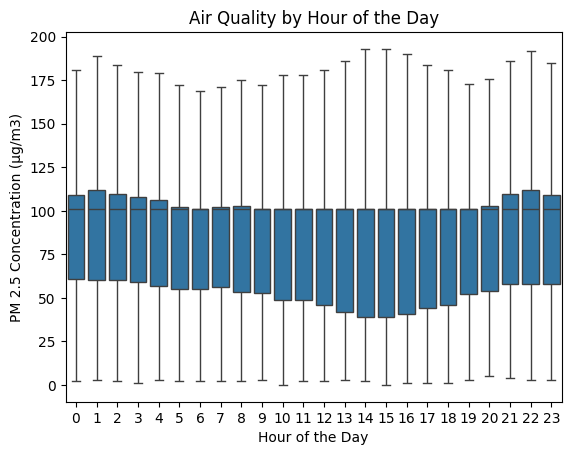

In [24]:
import calendar  # Import calendar module

# Ensure 'datetime' is the index and it is in the proper format
df.index = pd.to_datetime(df.index)

# Create a new column for the hour of the day extracted from the datetime index
df['hour'] = df.index.hour  # Extracts the hour from the datetime index

# Plot PM 2.5 level by Hour of the Day
plt.figure()
sns.boxplot(x="hour", y="pm2.5", data=df, showfliers=False)  # Use correct 'pm2.5' column name
plt.xlabel('Hour of the Day')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality by Hour of the Day')

# Set x-ticks to display hours from 0 to 23
plt.xticks(range(0, 24))
plt.show()

             DEWP      TEMP      PRES       Iws        Is        Ir   cbwd_NW  \
DEWP     1.000000  0.824633 -0.778346 -0.296399 -0.034410  0.125090 -0.337858   
TEMP     0.824633  1.000000 -0.826690 -0.154623 -0.092601  0.049121 -0.270293   
PRES    -0.778346 -0.826690  1.000000  0.185355  0.069028 -0.079843  0.229754   
Iws     -0.296399 -0.154623  0.185355  1.000000  0.021883 -0.010122  0.358815   
Is      -0.034410 -0.092601  0.069028  0.021883  1.000000 -0.009548 -0.022347   
Ir       0.125090  0.049121 -0.079843 -0.010122 -0.009548  1.000000  0.034362   
cbwd_NW -0.337858 -0.270293  0.229754  0.358815 -0.022347  0.034362  1.000000   
cbwd_SE  0.278151  0.311804 -0.250940 -0.079706  0.039963 -0.040180 -0.505490   
cbwd_cv  0.090622 -0.004743 -0.021696 -0.226972 -0.014557 -0.018725 -0.360530   
pm2.5    0.175671 -0.032510 -0.088578 -0.212758  0.020262 -0.045488 -0.188464   
hour    -0.020988  0.150066 -0.041928  0.056618 -0.002374 -0.006286 -0.128952   

          cbwd_SE   cbwd_cv

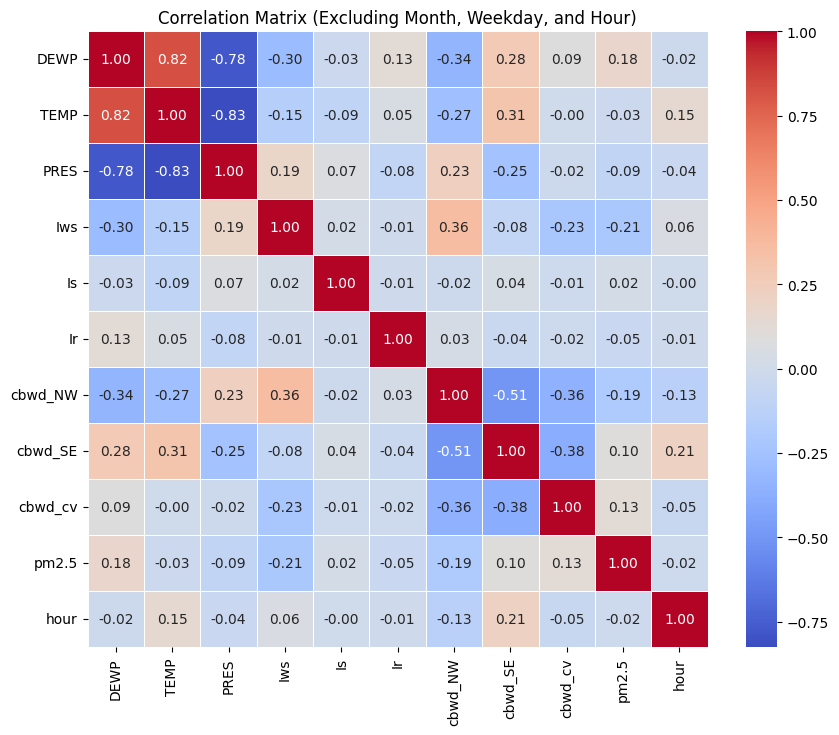

In [29]:
# Drop the 'month', 'weekday', and 'hour' columns if they exist
df_no_time = df

# Calculate the correlation matrix
correlation_matrix = df_no_time.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Excluding Month, Weekday, and Hour)')
plt.show()

# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [39]:
df.head()

# Check if 'pm2.5' exists in df
if 'pm2.5' in df.columns:
    y_train = df['pm2.5']  # Target variable
    X_train = df.drop(columns=['pm2.5'])  # Features (all columns except 'pm2.5')
else:
    print("Error: 'pm2.5' column not found in df")
# X_train = df.drop(['pm2.5'], axis=1)
# y_train = train['pm2.5']

# Separate target and features
# target = df['pm2.5']
# X_train = df  # Your features
# y_train = target  # Your target


In [40]:
df.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5,hour
datetime,,,,,,,,,,,
2010-01-01 00:00:00,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,0
2010-01-01 01:00:00,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,1
2010-01-01 02:00:00,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,2
2010-01-01 03:00:00,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,3
2010-01-01 04:00:00,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,4


In [42]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_train, axis=1)

In [32]:
df.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5,hour
datetime,,,,,,,,,,,
2010-01-01 00:00:00,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,0
2010-01-01 01:00:00,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,1
2010-01-01 02:00:00,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,2
2010-01-01 03:00:00,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,3
2010-01-01 04:00:00,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,100.793427,4


# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [43]:
#define model
model_16 = Sequential()
model_16.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_16.add(LSTM(128, activation='relu', return_sequences=True))  # Keep return_sequences=True to pass sequences
model_16.add(LSTM(64, activation='relu', return_sequences=True))  # Last LSTM should have return_sequences=False
model_16.add(LSTM(32, activation='relu', return_sequences=True))  # Last LSTM should have return_sequences=False
model_16.add(LSTM(16, activation='relu', return_sequences=False))  # Last LSTM should have return_sequences=False
model_16.add(Dense(1))


 # Compile the model
model_16.compile(
     optimizer=Adamax(learning_rate=0.001),
     loss='mse',
     metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
 )

# Display the model architecture
model_16.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 1, 256)              │         273,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 1, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 1, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,505 (2.04 MB)

 Trainable params: 535,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Early stopping to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,  # Stop if no improvement after 10 epochs
    restore_best_weights=True
)

# Train the model
# You can adjust the number of epochs and batch size to improve performance.
history = model_16.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]  # Include early stopping
)

Epoch 1/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - lambda: 89.7200 - loss: 8854.5293
Epoch 2/10
   3/1370 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - lambda: 74.6176 - loss: 5593.7578 

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: lambda,loss
  current = self.get_monitor_value(logs)


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - lambda: 64.1176 - loss: 4389.3091
Epoch 3/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - lambda: 62.2078 - loss: 4111.2930
Epoch 4/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - lambda: 62.4123 - loss: 4163.3286
Epoch 5/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - lambda: 60.9681 - loss: 3972.4587
Epoch 6/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - lambda: 60.6181 - loss: 3906.3674
Epoch 7/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - lambda: 60.6225 - loss: 3914.7495
Epoch 8/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - lambda: 61.1004 - loss: 3997.0132
Epoch 9/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - lambda: 60.8082 - loss: 3986.1226
Epoch 10/10
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - lambda: 60.5171 - loss: 3929.1392


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


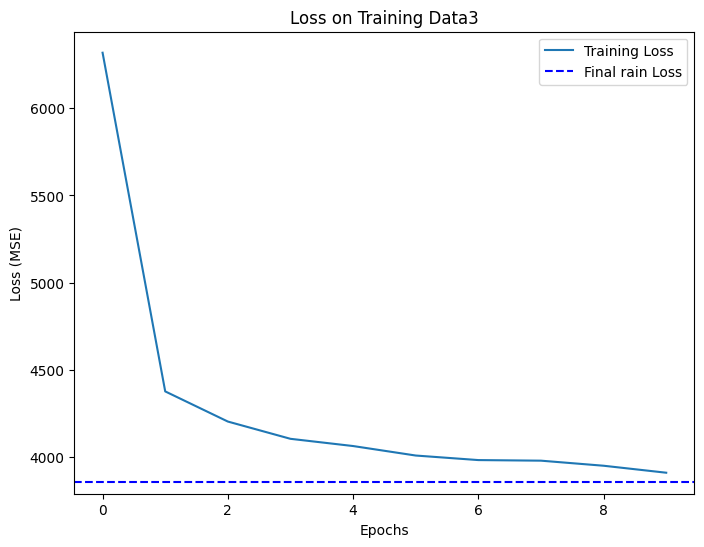

Final Training Loss (MSE): 3854.2400252746515
final raining loss (RMSE):62.08252592537333


In [45]:
# Calculate training loss
train_predictions = model_16.predict(X_train)
train_loss = np.mean((y_train - train_predictions.flatten())**2)
train_loss_RSME = np.sqrt(train_loss)

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final rain Loss')  # Final training loss
plt.title('Loss on Training Data3')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")
print(f"final raining loss (RMSE):{train_loss_RSME}")

Shape of X_test: (43824, 10)
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
Shape of predictions: (43824, 1), Shape of y_true: (43824,)
Mean Squared Error (MSE): 3854.18
Root Mean Squared Error (RMSE): 62.08
R² (Coefficient of Determination): 0.32


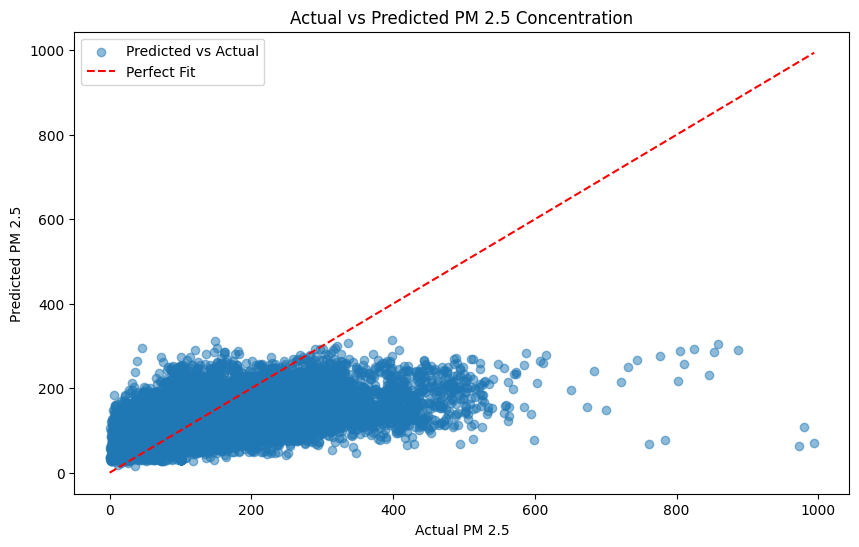

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the test data
X_test = df.drop(columns=['pm2.5'])  # Keep df unchanged (drop 'pm2.5' column)
y_true = df['pm2.5'].values  # Keep actual values for evaluation

# Check shape of X_test to ensure it aligns with model expectations
print(f"Shape of X_test: {X_test.shape}")

# Expand dimensions only if required by your model (ensure it's in the correct shape)
X_test = np.expand_dims(X_test, axis=1)  # Adjust if model requires this

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model_16.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers (if required)
predictions = np.round(predictions).astype(int)

# Check the shape of predictions and actual values
print(f"Shape of predictions: {predictions.shape}, Shape of y_true: {y_true.shape}")

# Prepare the submission file
submission = pd.DataFrame({
    'row ID': pd.to_datetime(df.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Convert to string format
    'pm2.5': predictions.flatten()  # Flatten predictions to match the expected shape
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
#submission.to_csv('/content/drive/MyDrive/Assement/subm_fixed5.csv', index=False)

# Calculate evaluation metrics if actual values exist
if y_true is not None and predictions is not None:
    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, predictions)

    # Print metrics
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² (Coefficient of Determination): {r2:.2f}")

    # Visualize Actual vs Predicted Values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, predictions, alpha=0.5, label="Predicted vs Actual")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label="Perfect Fit")  # Line of perfect prediction
    plt.xlabel('Actual PM 2.5')
    plt.ylabel('Predicted PM 2.5')
    plt.title('Actual vs Predicted PM 2.5 Concentration')
    plt.legend()
    plt.show()

    # Visualize Residuals (Errors)
    residuals = y_true - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted PM 2.5')
    plt.ylabel('Residuals (Error)')
    plt.title('Residuals of the Predictions')
    plt.show()

    # Check if RMSE is acceptable based on a threshold
    acceptable_rmse_threshold = 50  # Adjust based on domain knowledge
    if rmse < acceptable_rmse_threshold:
        print("✅ Model performance is acceptable.")
    else:
        print("❌ Model performance is not acceptable. Consider improving the model.")
else:
    print("⚠️ 'pm2.5' column not found in test dataset. Cannot compute metrics.")
